# **Aerogel Bonding Project**
###  Francesco Costa, Lorenzo Cinelli, Sebastian jr Foumane

The project consisted of analyzing the *AEROGEL BONDING* dataset and with such given set perform a variety of steps, such as, EDA (Exploratory Data Analysis), defining the problem type, pre-processing data, using training, validation and test set, and much more to understand whether the aerogel bonding is good enough for the commercial application.



## EDA

Perform an Exploratory Data Analysis with visualization:

- *Load and Inspect the Data*
- *Statistical Summary* 
- *Data Cleaning*
- *Visualizations*

**Key Observations** :
- *Shape of the Dataset*: 
    - The dataset contains 20,000 rows and 31 columns.

- *Missing Data*: 
    - Many columns have missing values. For instance:
    - HolidaysTaken has 1,905 missing values.
    - PercentageOfCompletedTasks has 2,045 missing values.

- *Data Types*:
    - 27 columns are numerical (float64).
    - 4 columns are categorical (object).

- *Next Steps*:
    - Visualize missing data.
    - Analyze the distribution of key numerical features.
    - Examine correlations and relationships with the target variable, BondingSuccessful.

We import the necessary libraries.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We load the dataset (CSV file) and we plot the first 5 rows of all the columns(in total there are 31 columns).

In [19]:
file_path = 'aerogel_bonding (1).csv'
df = pd.read_csv(file_path)
df.sample(5, random_state = 42)

,HolidaysTaken,PercentageOfCompletedTasks,CurrentJobDuration,RecentHolidaysTaken,RequestedProcessAmount,JobStatus,BondingRiskRating,TotalMaterialProcessed,ByproductRation,working_skills,...,TotalMaterialToProcess,WorkHistoryDuration,ApplicantAge,PriorExecutionDefaults,DifferentTasksCompleted,TotalChurnRisk,OtherCompaniesMaterialProcessed,BondingPeriod,trustability,MonthlyExecutions
10650,0.0,0.408910,5.0,0.0,35577.0,Employed,53.0,23688.0,0.218621,1.513446,...,10600.0,NaN,41.0,0.0,1.0,NaN,13088.0,24.0,3.527723,386.0
2041,4.0,0.215269,8.0,1.0,NaN,Employed,51.0,67956.0,0.446476,4.536211,...,2583.0,19.0,35.0,0.0,1.0,0.248627,65373.0,60.0,2.042271,NaN
8668,5.0,0.057655,3.0,1.0,18233.0,Self-Employed,56.0,40542.0,0.328947,2.104998,...,12831.0,13.0,53.0,0.0,1.0,0.244147,27711.0,NaN,2.810025,548.0
1114,2.0,0.084179,5.0,0.0,13971.0,Employed,57.0,35789.0,0.463089,1.964776,...,15223.0,8.0,NaN,0.0,3.0,0.176777,20566.0,48.0,2.657860,254.0
13902,2.0,0.086089,NaN,1.0,38847.0,Employed,54.0,56237.0,0.220161,NaN,...,NaN,6.0,38.0,0.0,1.0,0.273237,5534.0,72.0,3.342685,402.0


#### Info of the dataset
Display basic dataset information, including column data types, non-null counts, the first few rows and the dataset dimensions.
- Basic information about the dataset
- Preview of the first few rows
- Dataset dimensions (rows, columns)

In [7]:
df_info = df.info()           
df_head = df.head()              
df_shape = df.shape             
df_head, df_shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HolidaysTaken                    18095 non-null  float64
 1   PercentageOfCompletedTasks       17955 non-null  float64
 2   CurrentJobDuration               17952 non-null  float64
 3   RecentHolidaysTaken              18031 non-null  float64
 4   RequestedProcessAmount           17925 non-null  float64
 5   JobStatus                        17982 non-null  object 
 6   BondingRiskRating                17950 non-null  float64
 7   TotalMaterialProcessed           17957 non-null  float64
 8   ByproductRation                  18028 non-null  float64
 9   working_skills                   18034 non-null  float64
 10  CivilStatus                      18046 non-null  object 
 11  dependability                    18051 non-null  float64
 12  MistakesLastYear  

(   HolidaysTaken  PercentageOfCompletedTasks  CurrentJobDuration  \
 0            4.0                         NaN                 6.0   
 1            1.0                    0.323046                 4.0   
 2            5.0                    0.491574                 3.0   
 3            4.0                    0.108916                 3.0   
 4            NaN                    0.174628                 1.0   
 
    RecentHolidaysTaken  RequestedProcessAmount JobStatus  BondingRiskRating  \
 0                  1.0                 51172.0  Employed               46.0   
 1                  0.0                 11246.0  Employed               54.0   
 2                  1.0                 14075.0  Employed               42.4   
 3                  1.0                 18957.0  Employed               40.8   
 4                  2.0                 17902.0  Employed               51.0   
 
    TotalMaterialProcessed  ByproductRation  working_skills  ...  \
 0                300388.0        

From Dtype column we see that the numerical variables (float64) are 27 and the categorical variables (object) are 4.

#### Finding some metrics of the variables
Then we use the describe function to have some insights to take in consideration.

In [8]:
sum_stats= df.describe()
sum_stats.T

,count,mean,std,min,25%,50%,75%,max
HolidaysTaken,18095.0,3.026748,1.735829,0.000000,2.000000,3.000000,4.000000,1.300000e+01
PercentageOfCompletedTasks,17955.0,0.285759,0.159537,0.000974,0.160089,0.266699,0.390030,8.785645e-01
CurrentJobDuration,17952.0,5.009693,2.241757,0.000000,3.000000,5.000000,6.000000,1.600000e+01
RecentHolidaysTaken,18031.0,0.994454,0.988381,0.000000,0.000000,1.000000,2.000000,7.000000e+00
RequestedProcessAmount,17925.0,24897.926750,13437.679650,3674.000000,15607.000000,21916.000000,30790.000000,1.847320e+05
BondingRiskRating,17950.0,50.762841,7.773452,28.800000,46.000000,52.000000,56.000000,8.400000e+01
TotalMaterialProcessed,17957.0,96722.908114,121162.137838,2098.000000,31031.000000,60628.000000,116537.000000,2.619627e+06
ByproductRation,18028.0,0.286063,0.159942,0.001720,0.161822,0.264880,0.390876,9.022527e-01
working_skills,18034.0,2.360612,0.991873,0.000000,1.679249,2.363138,3.033026,5.000000e+00
dependability,18051.0,2.374670,0.988894,0.000000,1.693475,2.376003,3.057523,5.000000e+00


#### Checking Missing Values

It is crucial in data analysis and preprocessing to check missing values for several reasons:
- **Data Quality** 
- **Model Performance** 
- **Preprocessing Decisions** 
- **Feature Evaluation** 

In [9]:
df_missing = df.isnull().sum()
df_missing

HolidaysTaken                      1905
PercentageOfCompletedTasks         2045
CurrentJobDuration                 2048
RecentHolidaysTaken                1969
RequestedProcessAmount             2075
JobStatus                          2018
BondingRiskRating                  2050
TotalMaterialProcessed             2043
ByproductRation                    1972
working_skills                     1966
CivilStatus                        1954
dependability                      1949
MistakesLastYear                   1987
HighestEducationAttained           2063
BondingSuccessful                  2003
ChurnRisk                          2072
ProcessedKilograms                 1954
SkillRating                        1967
ProcessingTimestamp                2023
WorkExperience                     1931
HistoricalBehavior                 2009
TotalMaterialToProcess             1955
WorkHistoryDuration                2002
ApplicantAge                       2068
PriorExecutionDefaults             2055


#### The Heatmap of the missing values
This code creates a heatmap that displays the missing data in the dataset. Each light cell in the heatmap represents a missing value. The image brings out the existence of large amounts of missing values in different columns which may possibly interfere with the quality and completeness of the analysis and modeling process. Such missing data must be resolved through any of the two alternative methods, imputation or removal, so as to guarantee an effective output.


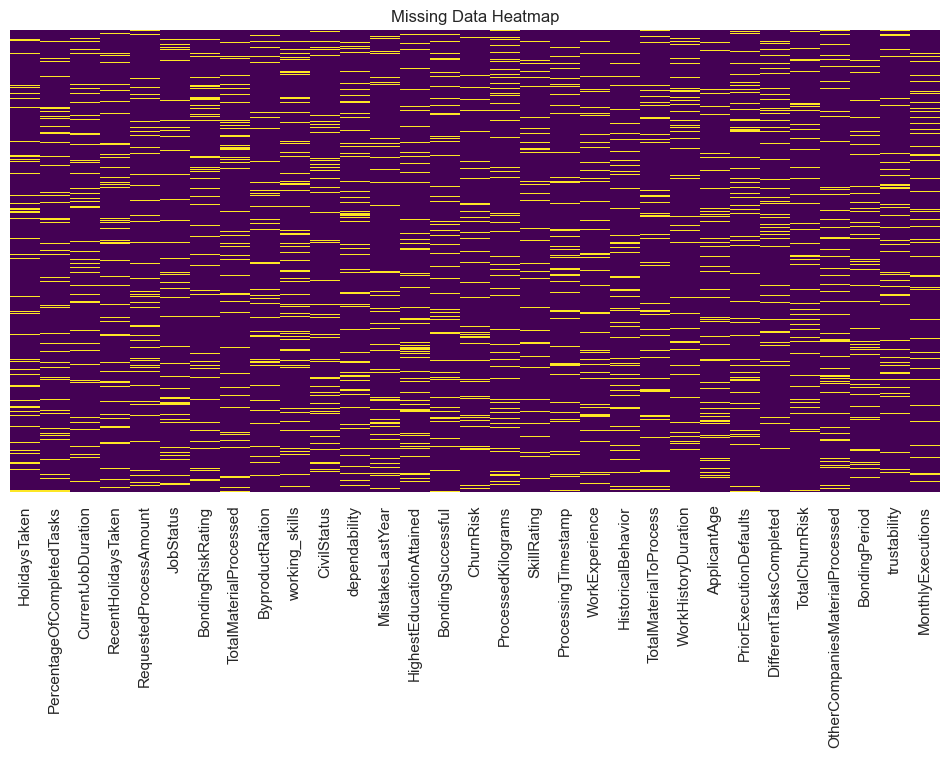

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.title("Missing Data Heatmap")
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.show()


#### Distribution of BondingSuccesful before balancing

This section shows how `BondingSuccessful` (our target variable) is distributed.  
We observe that the dataset is **imbalanced**, with significantly more unsuccessful (`0`) cases compared to successful (`1`) cases.  
It is necessary to balance it.

/var/folders/s1/ysgv8n6d02g3t606l3p3t0r80000gn/T/ipykernel_3097/1317696212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BondingSuccessful', data=df, palette="Set2")


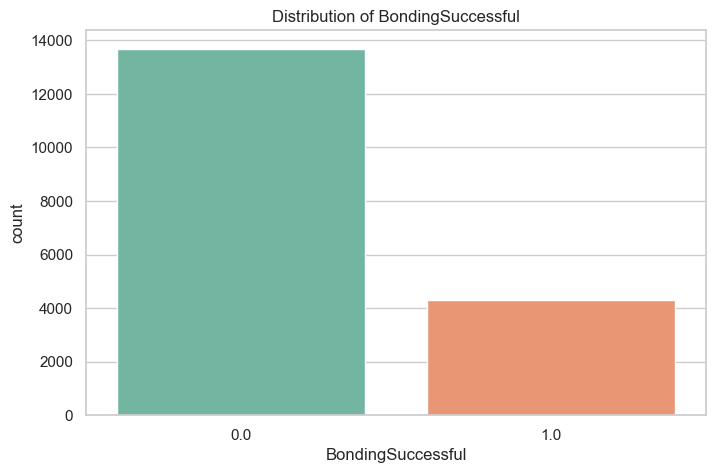

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='BondingSuccessful', data=df, palette="Set2")
plt.title("Distribution of BondingSuccessful")
plt.show()

### Balancing

We do the "Balancing" to address class imbalance in the dataset, ensuring that all classes in the target variable are equally represented. It is crucial for:

- **Preventing Model Bias** 
- **Improving Accuracy** 
- **Better Generalization**



#### Sort unsuccessful rows by missing count
This code focuses on the unsuccessful rows (`BondingSuccessful = False`) to analyze and handle missing data. By calculating the number of missing values (`missing_count`) and sorting rows in descending order, it helps identify and prioritize the rows with the most missing data for cleaning, imputation, or removal.


In [10]:
# Filter unsuccessful rows
df_unsucc = df[df["BondingSuccessful"] == False].copy()

# Add the 'missing_count' column
df_unsucc["missing_count"] = df_unsucc.isna().sum(axis=1)

# Sort the rows by 'missing_count' in descending order
df_unsucc_sorted = df_unsucc.sort_values(by="missing_count", ascending=False)

# Display the top 5 rows with the highest missing count
print("Unsuccessful rows sorted by 'missing_count' (top 5):")
print(df_unsucc_sorted.head(5))


Unsuccessful rows sorted by 'missing_count' (top 5):
       HolidaysTaken  PercentageOfCompletedTasks  CurrentJobDuration  \
17899            2.0                         NaN                 4.0   
15778            NaN                    0.254748                 3.0   
18091            4.0                    0.142625                 4.0   
9169             2.0                         NaN                 4.0   
13610            3.0                    0.466226                 5.0   

       RecentHolidaysTaken  RequestedProcessAmount      JobStatus  \
17899                  3.0                 28072.0       Employed   
15778                  0.0                 22047.0       Employed   
18091                  1.0                     NaN       Employed   
9169                   0.0                     NaN  Self-Employed   
13610                  NaN                 56858.0            NaN   

       BondingRiskRating  TotalMaterialProcessed  ByproductRation  \
17899               56.0      

Now we remove worst (top missing) unsuccessful rows and combine with successful

In [11]:
df_succ = df[df["BondingSuccessful"] == True].copy()
desired_unsuccessful_count = df_succ.shape[0]
current_unsuccessful_count = df_unsucc_sorted.shape[0]
to_remove = current_unsuccessful_count - desired_unsuccessful_count

print(f"We have {current_unsuccessful_count} unsuccessful rows total.")
print(f"We want only {desired_unsuccessful_count} of them.")
print(f"That means removing the top {to_remove} 'worst' rows...")

# Keep only the last 4307 from the sorted DataFrame
df_unsucc_reduced = df_unsucc_sorted.iloc[-desired_unsuccessful_count:].copy()

print("\nShape of unsuccessful after dropping worst offenders:", df_unsucc_reduced.shape)

# Combine unsuccessful with successful
df_balanced = pd.concat([df_succ, df_unsucc_reduced], axis=0)

# Optional shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nBalanced DataFrame shape:", df_balanced.shape)
print("New distribution of BondingSuccessful:")
print(df_balanced["BondingSuccessful"].value_counts())


We have 13690 unsuccessful rows total.
We want only 4307 of them.
That means removing the top 9383 'worst' rows...

Shape of unsuccessful after dropping worst offenders: (4307, 32)

Balanced DataFrame shape: (8614, 32)
New distribution of BondingSuccessful:
BondingSuccessful
1.0    4307
0.0    4307
Name: count, dtype: int64


##### Observations

- Initially, there were **13,690 unsuccessful rows** (`BondingSuccessful = 0`), reduced to **4,307** to balance with the **4,307 successful rows** (`BondingSuccessful = 1`).
- **9,383 rows** with the highest missing values were removed.
- The final dataset has **8,614 rows**, evenly split between successful and unsuccessful cases.
- This ensures a balanced dataset, improved data quality, and readiness for model training.


In [12]:
# We drop "missing_count":
if "missing_count" in df_balanced.columns:
    df_balanced.drop(columns=["missing_count"], inplace=True, errors="ignore")

# Define target and features
target = "BondingSuccessful"
y = df_balanced[target]
X = df_balanced.drop(columns=[target])

print("X shape:", X.shape)
print("y shape:", y.shape)

# Quick check of how many NaNs remain
print("\nMissing values in X after balancing (but before imputation):")
print(X.isnull().sum())


X shape: (8614, 30)
y shape: (8614,)

Missing values in X after balancing (but before imputation):
HolidaysTaken                      608
PercentageOfCompletedTasks         627
CurrentJobDuration                 651
RecentHolidaysTaken                629
RequestedProcessAmount             631
JobStatus                          625
BondingRiskRating                  648
TotalMaterialProcessed             608
ByproductRation                    608
working_skills                     571
CivilStatus                        618
dependability                      592
MistakesLastYear                   603
HighestEducationAttained           636
ChurnRisk                          642
ProcessedKilograms                 583
SkillRating                        635
ProcessingTimestamp                617
WorkExperience                     578
HistoricalBehavior                 605
TotalMaterialToProcess             632
WorkHistoryDuration                598
ApplicantAge                       612
Prio


- We dropped the `missing_count` column, which is no longer needed for model training.
- We defined `y` as the target variable (`BondingSuccessful`) and `X` as the feature matrix.
- We checked for missing values in `X` to identify which columns need preprocessing.
- We verified the shapes of `X` and `y` to ensure they are aligned and ready for training.

So the dataset is cleaned and balanced, with the target variable and features separated.



#### Basic Info after Balancing
We display basic dataset information after the balancing, including column data types, non-null counts, the first few rows, the dataset dimensions, and missing values.


In [13]:
df_balanced_info = df_balanced.info()
df_balanced_head = df_balanced.head()
df_balanced_shape = df_balanced.shape
df_balanced_head, df_balanced_shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8614 entries, 0 to 8613
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HolidaysTaken                    8006 non-null   float64
 1   PercentageOfCompletedTasks       7987 non-null   float64
 2   CurrentJobDuration               7963 non-null   float64
 3   RecentHolidaysTaken              7985 non-null   float64
 4   RequestedProcessAmount           7983 non-null   float64
 5   JobStatus                        7989 non-null   object 
 6   BondingRiskRating                7966 non-null   float64
 7   TotalMaterialProcessed           8006 non-null   float64
 8   ByproductRation                  8006 non-null   float64
 9   working_skills                   8043 non-null   float64
 10  CivilStatus                      7996 non-null   object 
 11  dependability                    8022 non-null   float64
 12  MistakesLastYear    

(   HolidaysTaken  PercentageOfCompletedTasks  CurrentJobDuration  \
 0            4.0                    0.247042                 6.0   
 1            1.0                    0.196421                 4.0   
 2            NaN                    0.152103                 1.0   
 3            4.0                    0.173834                 6.0   
 4            1.0                    0.101803                 6.0   
 
    RecentHolidaysTaken  RequestedProcessAmount      JobStatus  \
 0                  0.0                     NaN       Employed   
 1                  2.0                 13313.0       Employed   
 2                  1.0                 31473.0  Self-Employed   
 3                  0.0                 18360.0            NaN   
 4                  0.0                 16422.0       Employed   
 
    BondingRiskRating  TotalMaterialProcessed  ByproductRation  working_skills  \
 0               40.0                     NaN         0.293118        4.287318   
 1               48.0 

We need a further rereading of the data, because only some rows were deleted.

In [14]:
df_balanced.describe(include='all')  # both for numerical and for categorical
df_balanced.isnull().sum()


HolidaysTaken                      608
PercentageOfCompletedTasks         627
CurrentJobDuration                 651
RecentHolidaysTaken                629
RequestedProcessAmount             631
JobStatus                          625
BondingRiskRating                  648
TotalMaterialProcessed             608
ByproductRation                    608
working_skills                     571
CivilStatus                        618
dependability                      592
MistakesLastYear                   603
HighestEducationAttained           636
BondingSuccessful                    0
ChurnRisk                          642
ProcessedKilograms                 583
SkillRating                        635
ProcessingTimestamp                617
WorkExperience                     578
HistoricalBehavior                 605
TotalMaterialToProcess             632
WorkHistoryDuration                598
ApplicantAge                       612
PriorExecutionDefaults             617
DifferentTasksCompleted  

We see that `BondingSuccessful` has **0 missing values** but for other variables missing values are still many and it indicates that further preprocessing (imputation or removal) is needed to handle these issues before modeling.

#### The Heatmap of the missing values after Balancing
We do the Heatmap of the missing values after the balancing to see some graphycal changes.

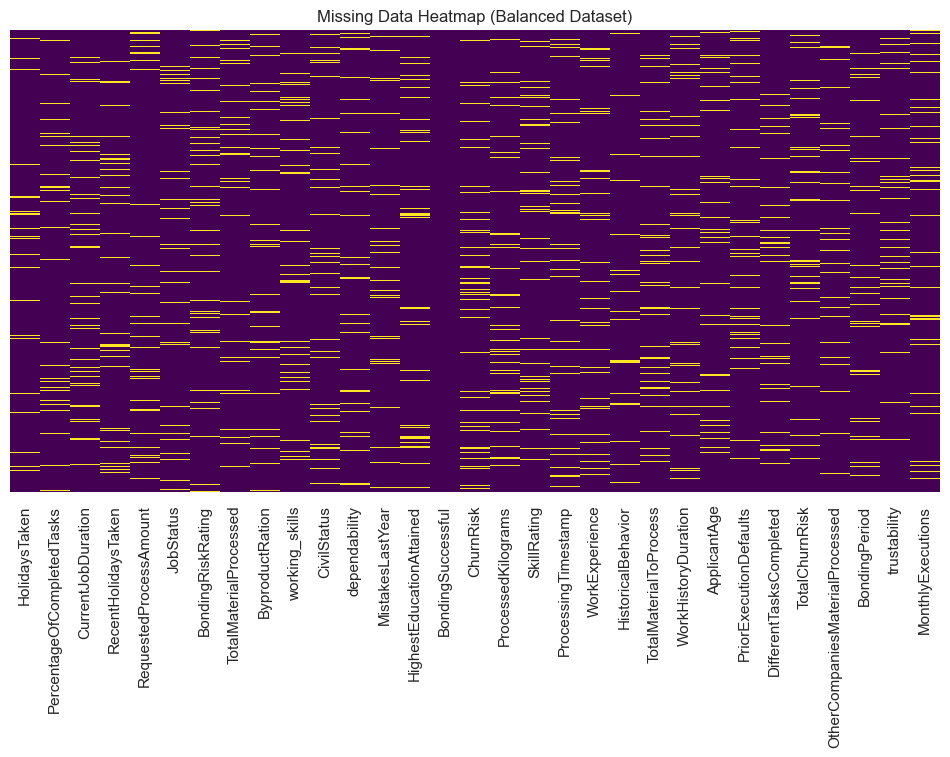

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title("Missing Data Heatmap (Balanced Dataset)")
sns.heatmap(df_balanced.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.show()


The heatmap shows missing data scattered across several columns, with some (e.g., `BondingRiskRating`, `TotalChurnRisk`) having significant gaps. `BondingSuccessful` have no missing values. Missing values appear randomly distributed rather than concentrated. We then have to preprocess to handle these gaps for reliable model training.


#### Data Visualization and Analysis:

For data visualization we use histograms with superimposed KDEs for up to 27 numerical features in the dataset, excluding missing values. Subplots are arranged in a grid for easy comparison of feature distributions.
We use them to understand the distribution of numerical features, identify skewness or outliers that may need handling and to assess data readiness for modeling by spotting patterns or irregularities.



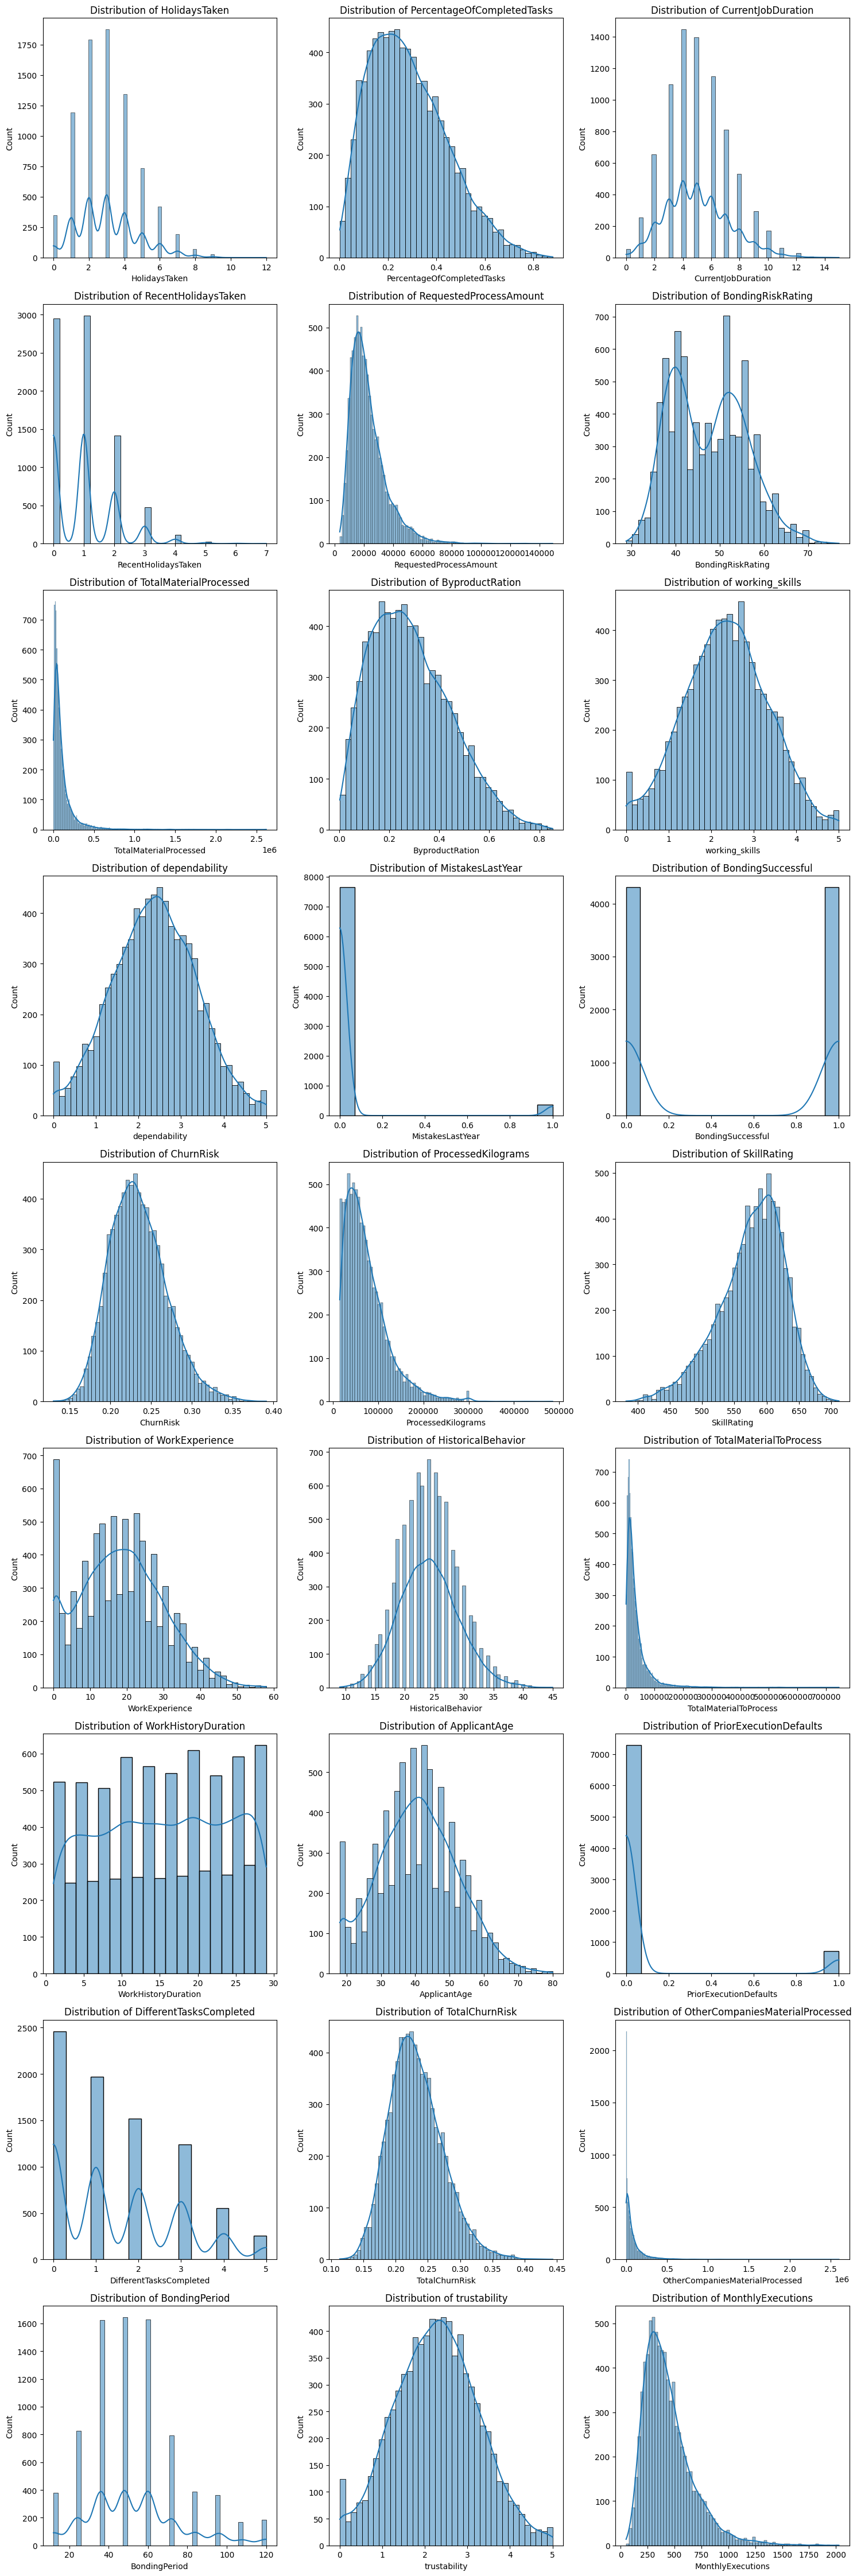

In [ ]:
# Select numerical features from the balanced dataset
numerical_features = df_balanced.select_dtypes(include=['float64', 'int64']).columns
num_features_to_plot = min(len(numerical_features), 27)

# Configure subplots: use the correct number of rows and columns for the required plots
nrows = (num_features_to_plot // 3) + (num_features_to_plot % 3 > 0)
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()

# Loop through the numerical columns and generate the plots
for i, col in enumerate(numerical_features[:num_features_to_plot]):
    sns.histplot(df_balanced[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide empty plots (if there are fewer than 27 columns)
for j in range(num_features_to_plot, len(axes)):
    axes[j].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### Observations: 

- **Right-skewed variables**: Some features (e.g., `RequestedProcessAmount`) have a long tail of larger values.
- **Normally distributed variables**: Features like `trustability` resemble a normal distribution.
- **Bimodal patterns**: Variables like `BondingRiskRating` show two distinct peaks.
- **Discrete variables**: Features like `HolidaysTaken` exhibit distinct, separate values.
- **Binary variables**: Features such as `BondingSuccessful` are concentrated at 0 and 1.


#### Categorical features

Even if the target variable is binary, examining categorical variables with a countplot is a useful step in EDA to better understand the distribution and potential relationships between variables.
We left out, purposefully `Processingtimestamp` because it increased the runtime by too much and so we looked at the 3 important categorical variables.


/var/folders/s1/ysgv8n6d02g3t606l3p3t0r80000gn/T/ipykernel_3097/2677562771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_balanced, palette="Set2")


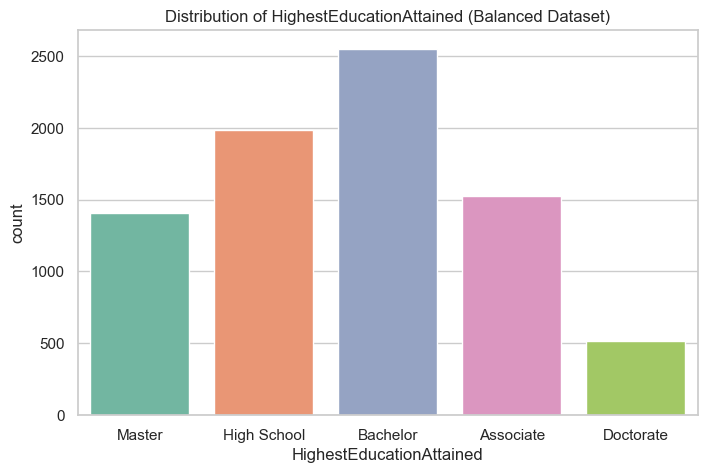

/var/folders/s1/ysgv8n6d02g3t606l3p3t0r80000gn/T/ipykernel_3097/2677562771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_balanced, palette="Set2")


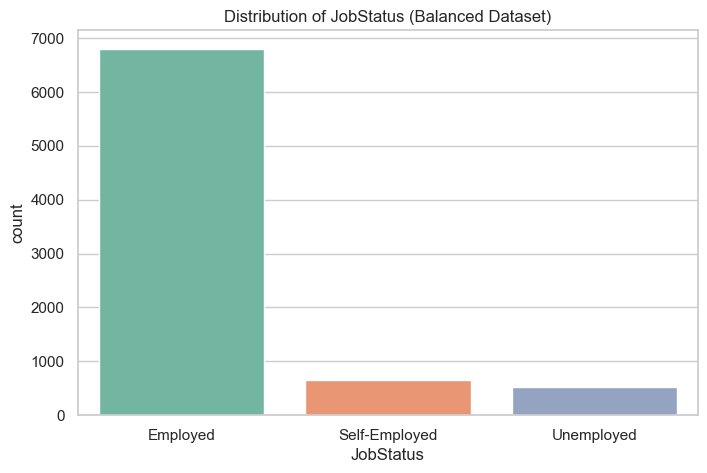

/var/folders/s1/ysgv8n6d02g3t606l3p3t0r80000gn/T/ipykernel_3097/2677562771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_balanced, palette="Set2")


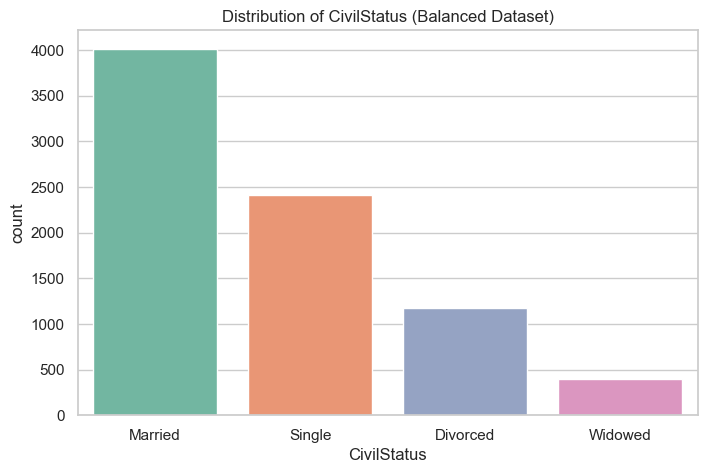

In [35]:
categorical_features = ['HighestEducationAttained', 'JobStatus', 'CivilStatus']
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df_balanced, palette="Set2")
    plt.title(f"Distribution of {col} (Balanced Dataset)")
    plt.show()


#### Observations:

Overall Insights:
The categorical features are imbalanced, with some categories (e.g., Bachelor, Employed, Married) dominating the dataset.
These imbalances could introduce bias into machine learning models.

#### Distribution of BondingSuccesful

This just shows how `BondingSuccessful` is distributed after the balancing. Before the balancing we could see that it was very imbalanced and there were many more unseccusful(0) rather than succesful(1) bonds.

/var/folders/s1/ysgv8n6d02g3t606l3p3t0r80000gn/T/ipykernel_3097/609701844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BondingSuccessful', data=df_balanced, palette="Set2")


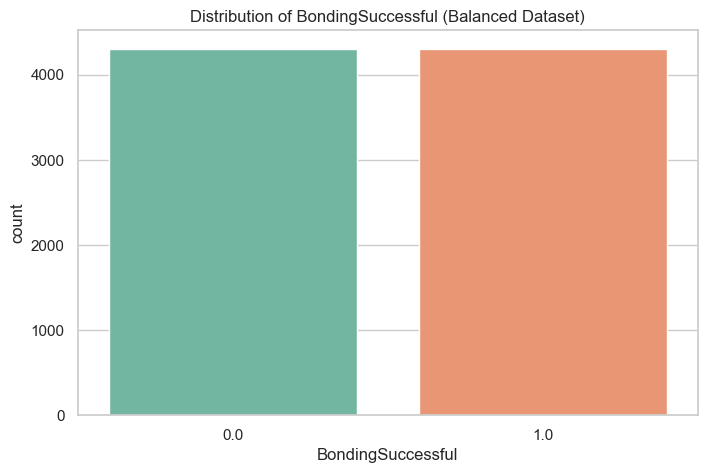

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(x='BondingSuccessful', data=df_balanced, palette="Set2")
plt.title("Distribution of BondingSuccessful (Balanced Dataset)")
plt.show()


#### Correlation Heatmap of Numerical Features

This Heatmap helps identify relationships and dependencies between numerical features in the dataset. Features with high correlation (positive or negative) can indicate redundancy or strong influence, guiding feature selection and model design. Look at the observations after to see why we dropped some columns.

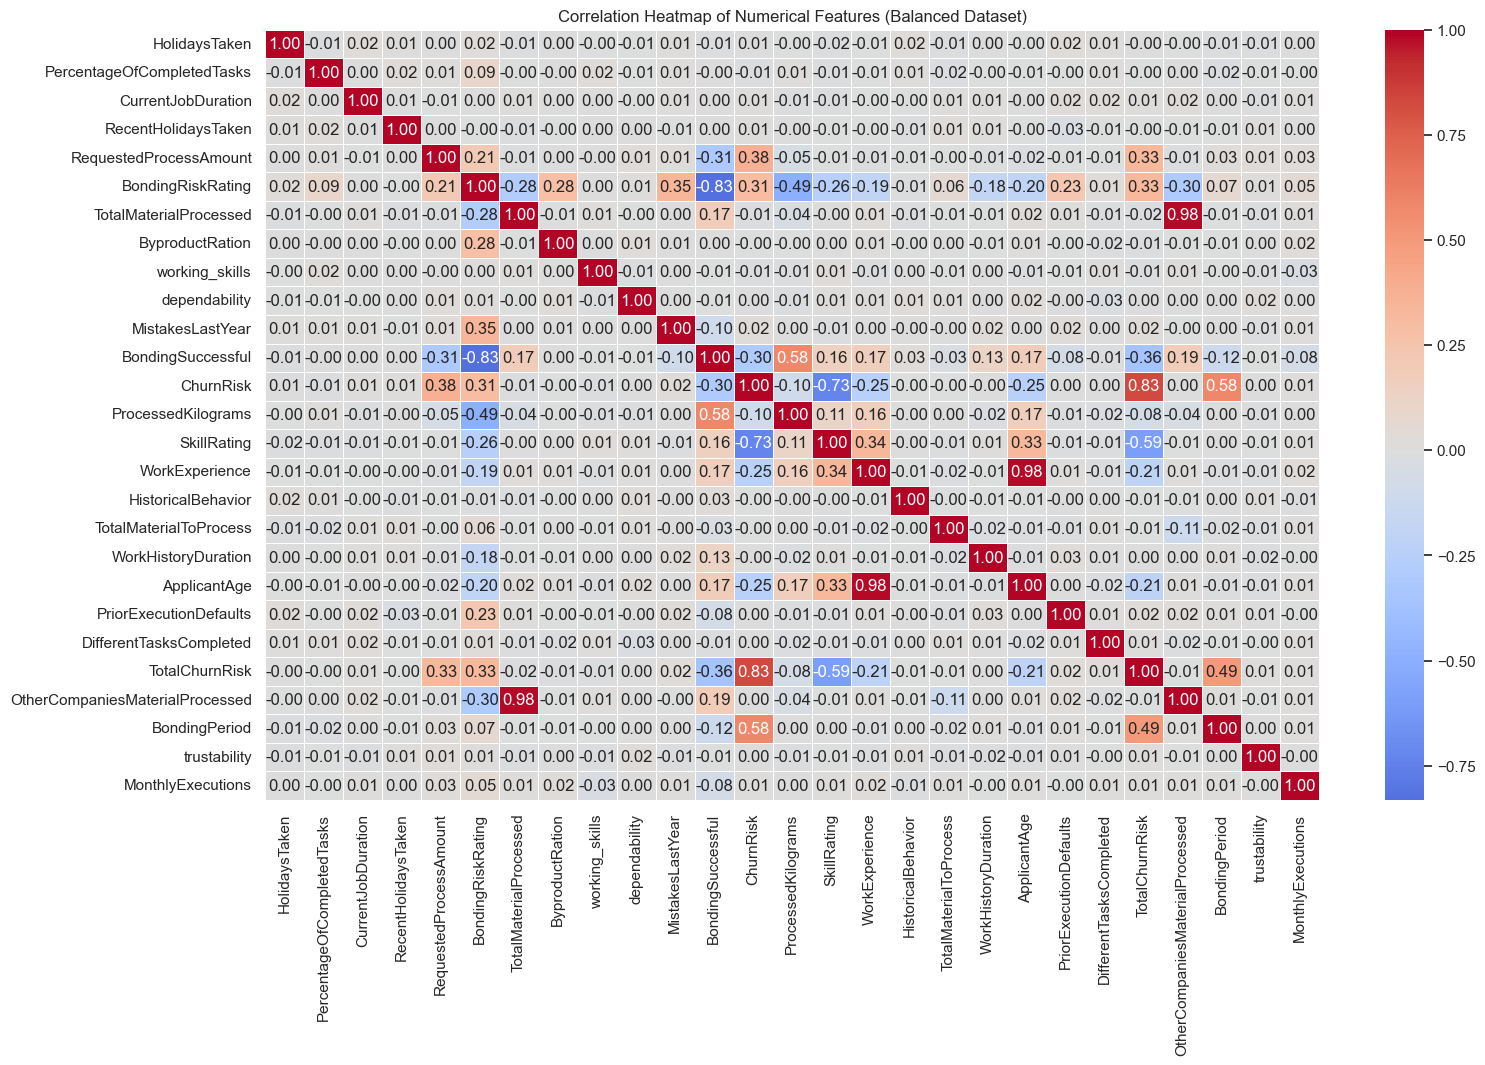

In [37]:
numerical_columns = df_balanced.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_balanced[numerical_columns].corr()

plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features (Balanced Dataset)")
plt.show()


#### Observations

- Strong correlation (0.98) between `TotalMaterialProcessed` and `OtherCompaniesMaterialProcessed`.
- For `ChurnRisk` and `TotalChurnRisk`, we occasionally dropped `TotalChurnRisk` due to redundancy or its high correlation with `SkillRating`.
- `ApplicantAge` might introduce unnecessary noise into the model if it does not contribute to improved predictive performance.

In [15]:
columns_to_drop = [
    'OtherCompaniesMaterialProcessed',
    'SkillRating',
    'WorkHistoryDuration',
    'TotalChurnRisk',
    'ApplicantAge',
    'ProcessingTimestamp'
]

existing_cols_to_drop = [col for col in columns_to_drop if col in df_balanced.columns]
if existing_cols_to_drop:
    df_balanced.drop(columns=existing_cols_to_drop, inplace=True)
    print("Dropped columns:", existing_cols_to_drop)
else:
    print("No matching columns to drop from the list.")


Dropped columns: ['OtherCompaniesMaterialProcessed', 'SkillRating', 'WorkHistoryDuration', 'TotalChurnRisk', 'ApplicantAge', 'ProcessingTimestamp']


#### More Visuals

We chose a set of columns that had a decently high correlation with the target variable and we plotted them in histograms. The numerical values were chosen from the Heatmap shown above.
This makes it easier to understand the numbers seen above and illustrates how connected the selected columns are to the target variable. For example, Bonding is Successful when the `BondingRiskRating` is low, which makes sense.

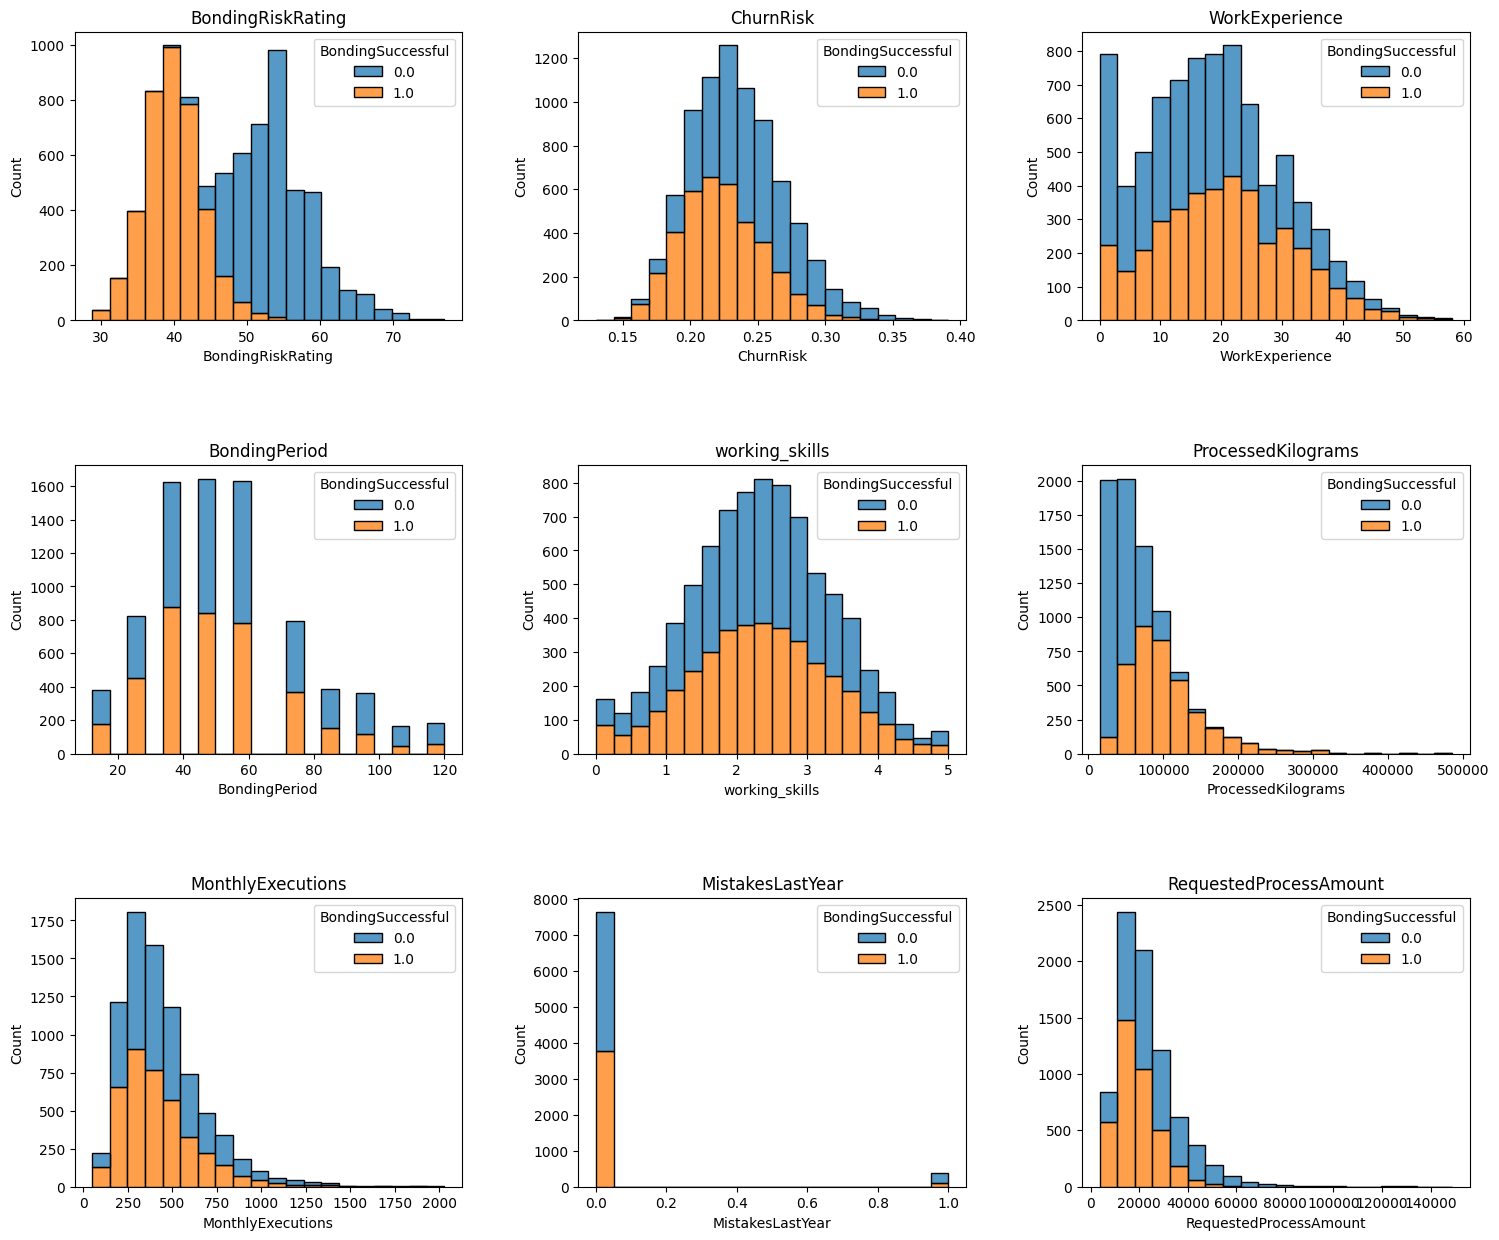

In [17]:
columns = [
    'BondingRiskRating', 'ChurnRisk', 'WorkExperience', 'BondingPeriod',
    'working_skills', 'ProcessedKilograms', 'MonthlyExecutions', 
    'MistakesLastYear', 'RequestedProcessAmount'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for ax, column in zip(axes, columns):
    sns.histplot(data=df_balanced, x=column, hue='BondingSuccessful', 
                 multiple='stack', bins=20, ax=ax)
    ax.set_title(column)

for i in range(len(columns), len(axes)):
    axes[i].set_visible(False)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()




The histograms reveal the following insights:

- **Distinctive Features:** Some features, such as `BondingRiskRating`, `BondingPeriod`, and `MistakesLastYear`, exhibit clear patterns that differentiate successful (`BondingSuccessful = 1`) and unsuccessful (`BondingSuccessful = 0`) outcomes. These features are likely strong predictors.
- **Overlapping Features:** Features like `ChurnRisk` and `working_skills` show significant overlap between the two classes, potentially limiting their predictive usefulness.
- **Skewed Distributions:** Features such as `ProcessedKilograms` and `MonthlyExecutions` have right-skewed distributions, with most values concentrated in lower ranges. These features may require transformations to improve model performance.
- **Presence of Outliers:** Features like `ProcessedKilograms` and `MonthlyExecutions` display long tails, indicating the presence of outliers that may need special handling.

This analysis highlights features that are likely to be strong predictors, as well as those that may need further transformation or handling. These insights can guide feature selection and preprocessing steps to improve model accuracy and robustness.


#### Box Plots

Box plots provide a visual summary of key statistics, including the median, interquartile range, and potential outliers. Useful for:

- **Identifying Outliers** 
- **Understanding Variability** 
- **Comparing Features** 



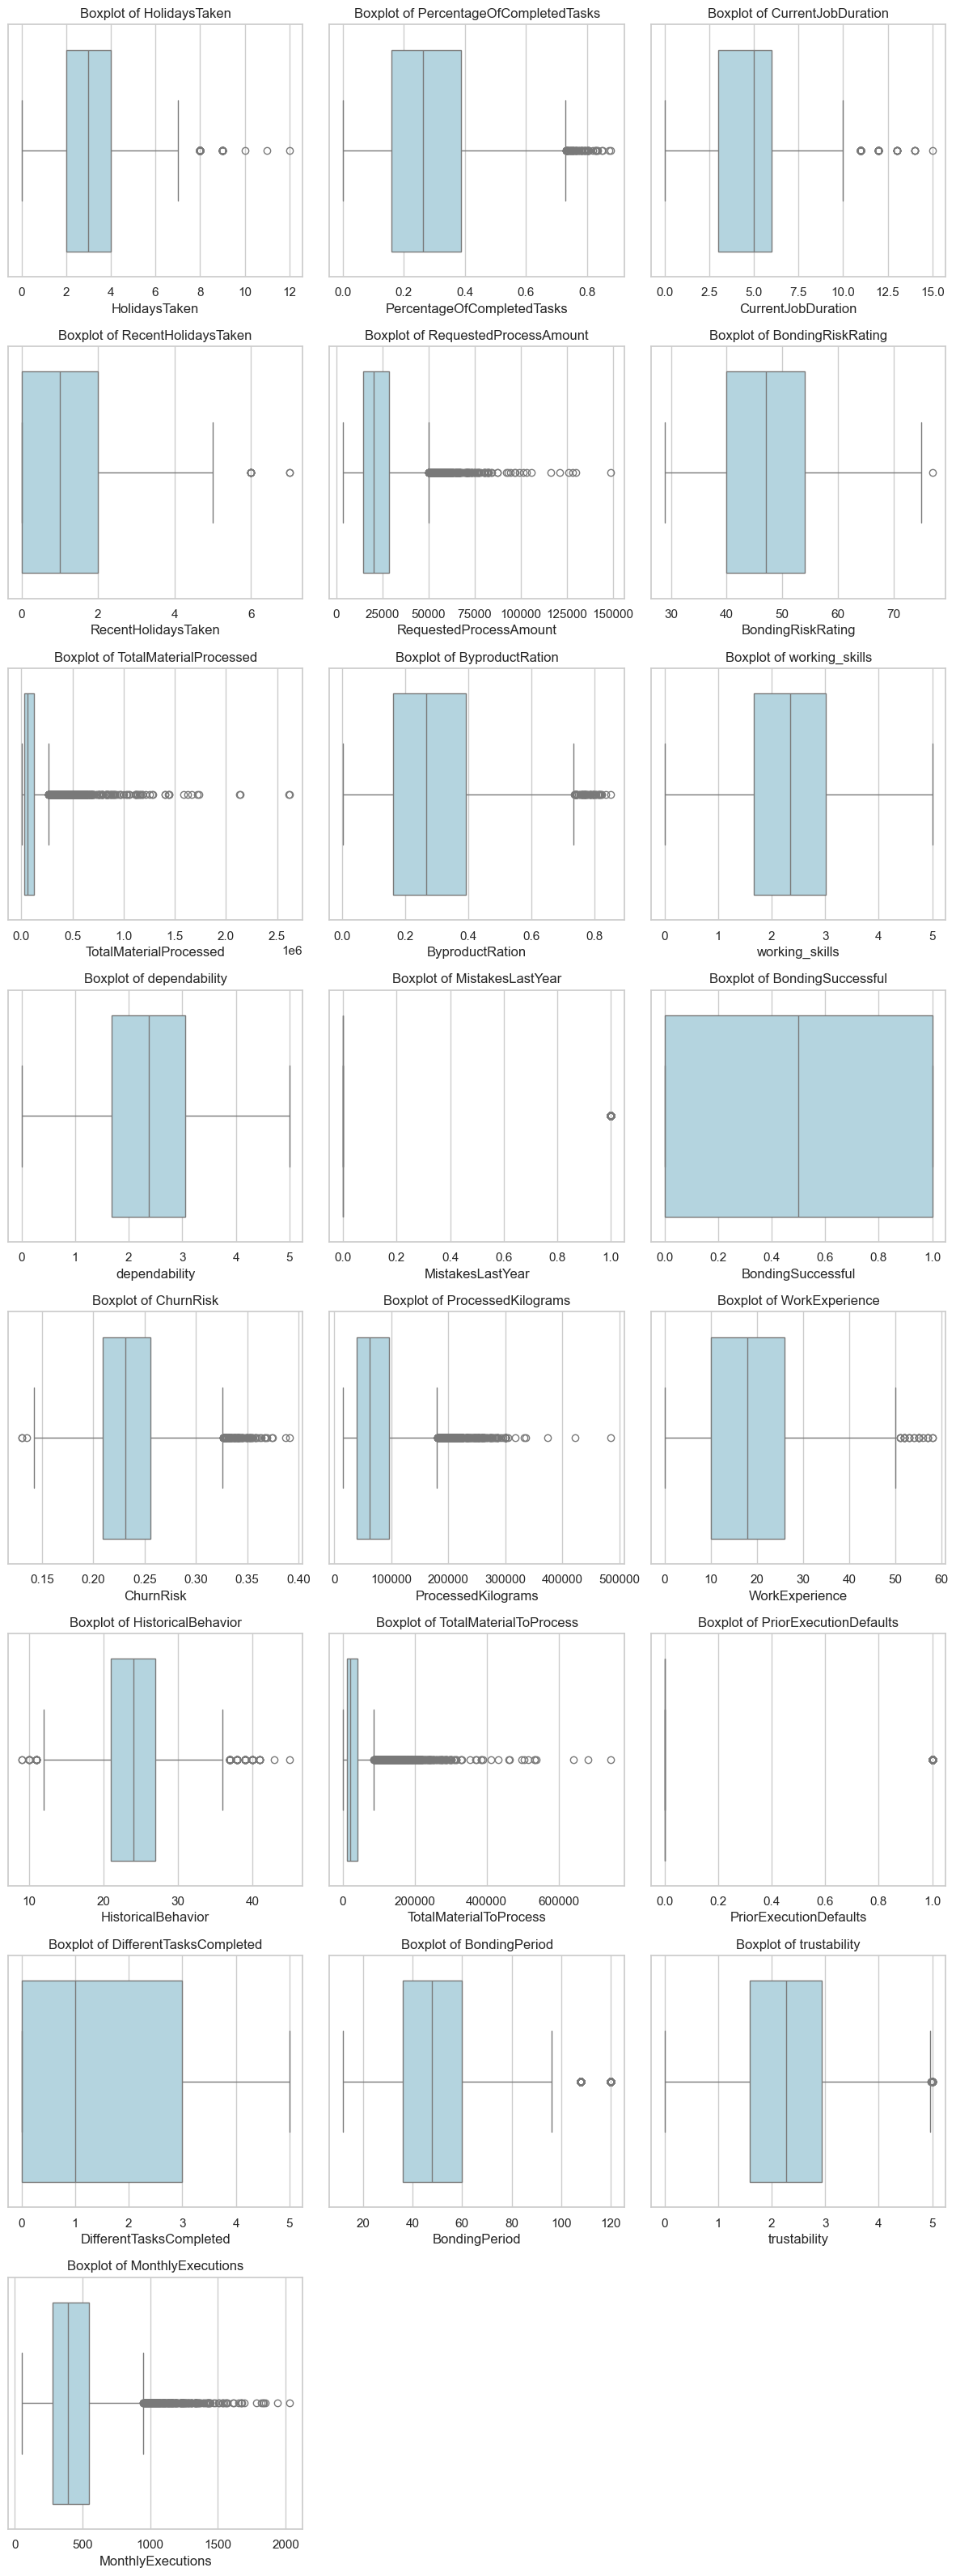

In [ ]:
numerical_features = df_balanced.select_dtypes(include=['number']).columns.tolist()

# Check if the list `numerical_features` is empty
if len(numerical_features) == 0:
    raise ValueError("Numerical features list is empty!")

# Define number of columns for subplots
ncols = 3

# Calculate the number of rows needed
nrows = (len(numerical_features) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(numerical_features):
    sns.boxplot(x=df_balanced[col], ax=axes[i], color="lightblue")
    axes[i].set_title(f"Boxplot of {col}")
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### Box Plot Observations

- **Outliers:** Many features, such as `TotalMaterialProcessed`, `RequestedProcessAmount`, and `MonthlyExecutions`, show significant outliers, which may require handling during preprocessing.

- **Skewed Distributions:** Features like `ProcessedKilograms` and `RequestedProcessAmount` are right-skewed, indicating the need for potential transformations to normalize these distributions.

- **Low Variability:** Some features, including `MistakesLastYear` and `PriorExecutionDefaults`, exhibit minimal variability, which could limit their predictive utility.

- **Balanced Target Variable:** The `BondingSuccessful` box plot confirms that the target variable is balanced across classes 0 and 1.

- **Wide Ranges:** Features like `TotalMaterialProcessed` and `TotalMaterialToProcess` have very wide ranges, suggesting that scaling may be necessary for consistent modeling.

- **Potential Noise:** Features with extreme outliers or low variability might introduce noise, and their relevance should be carefully evaluated.
.


#### Pairplot

A pairplot is a visualization that is used to examine the relationships among the multiple variables in the data set.

This code generates a pairplot to visualize pairwise relationships between the selected features and BondingSuccessful as the target variable being paired to.



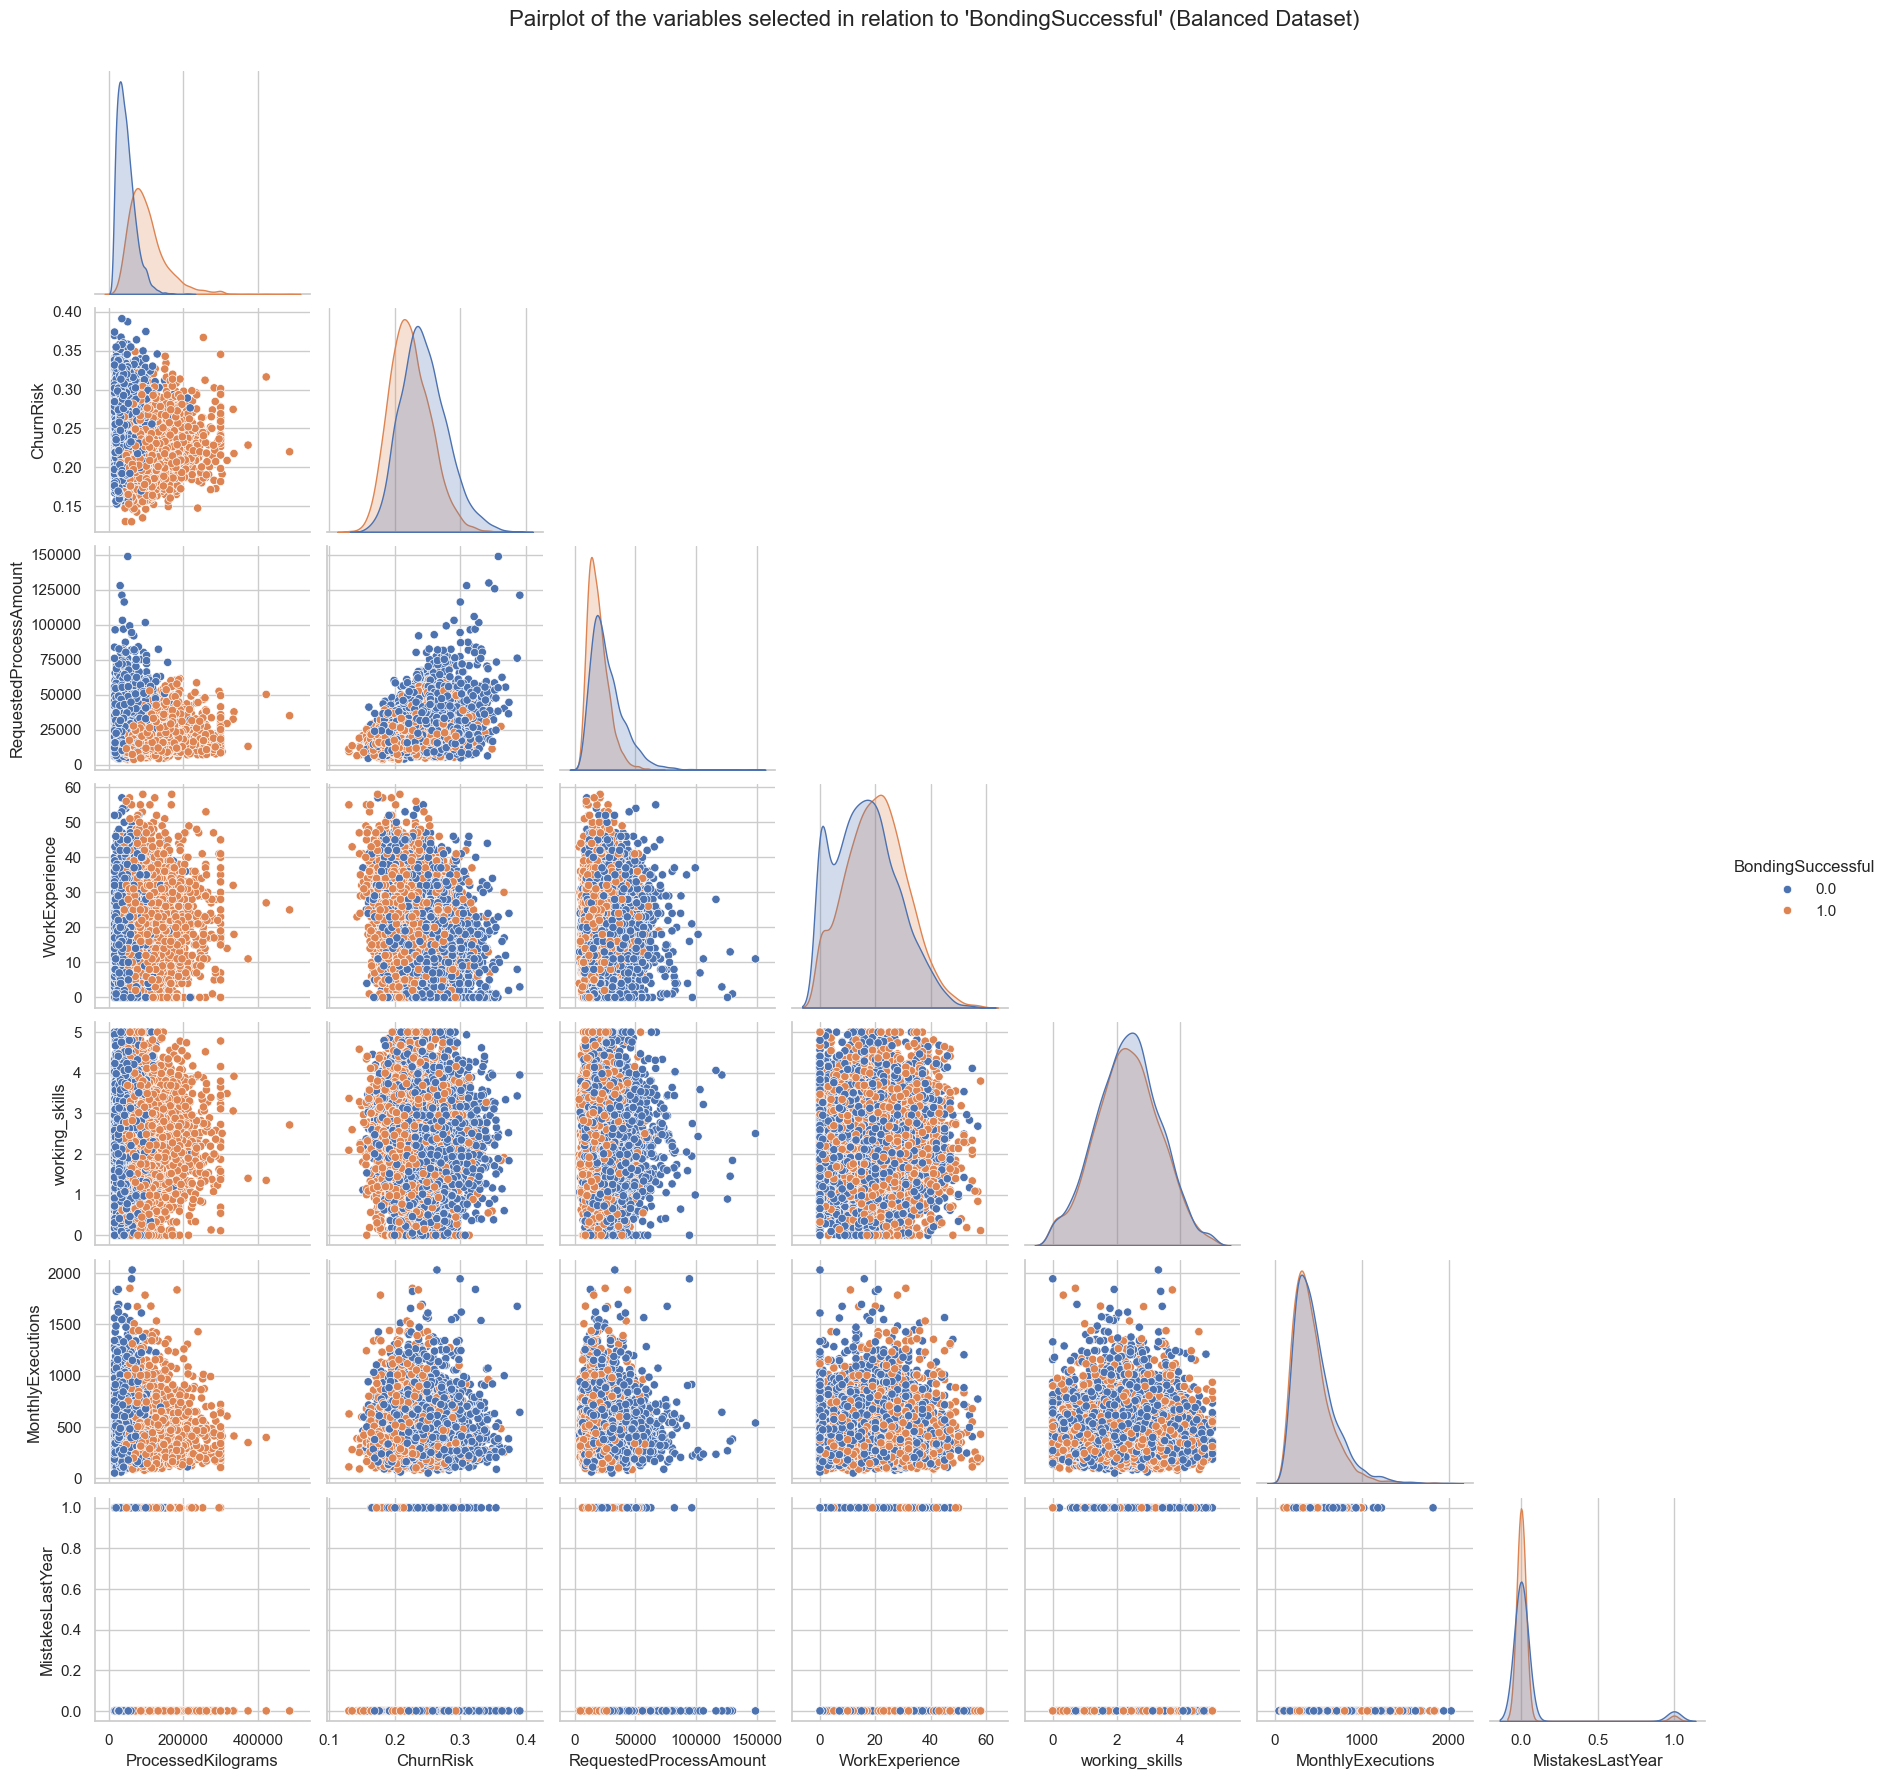

In [41]:
selected_features = [
    'ProcessedKilograms',
    'ChurnRisk',
    'RequestedProcessAmount',
    'WorkExperience',
    'working_skills',
    'BondingSuccessful',
    'MonthlyExecutions',
    'MistakesLastYear'
]

# Create the pairplot with 'BondingSuccessful' as hue
pairplot = sns.pairplot(
    df_balanced[selected_features],
    hue='BondingSuccessful',
    diag_kind='kde',
    corner=True
)

pairplot.fig.suptitle(
    "Pairplot of the variables selected in relation to 'BondingSuccessful' (Balanced Dataset)",
    y=1.02,
    fontsize=16
)

plt.show()


##### Observations
This pairplot illustrates the relationships between various features and the target variable "`BondingSuccessful`" in a balanced dataset. It reveals the following insights:
- `RequestedProcessAmount` and `ProcessedKilograms` show some weak separation between the two classes, with higher values being more frequent for `BondingSuccessful`=1.
- `MistakesLastYear` displays clearer separation, with most points clustering under `BondingSuccessful`=0.
- `ChurnRisk` offers limited usefulness due to significant overlap between the classes.
- `WorkExperience` demonstrates better class separation, particularly when combined with other features like `ProcessedKilograms` and `RequestedProcessAmount`
- There are several outliers in `MonthlyExecutions` and `ProcessedKilograms` which may need further analysis.
Overall, features such as `WorkExperience` `RequestedProcessAmount`, and `ProcessedKilograms` show potential for prediction, while `ChurnRisk` and `MistakesLastYear` may have limited predictive power.



#### Categorical Variable Analysis

The following code will illustrate a series of count plots of categorical variables in relation to the target variable. It will be done to see how the categorical variable are distributed in relation to `BondingSuccessful`.

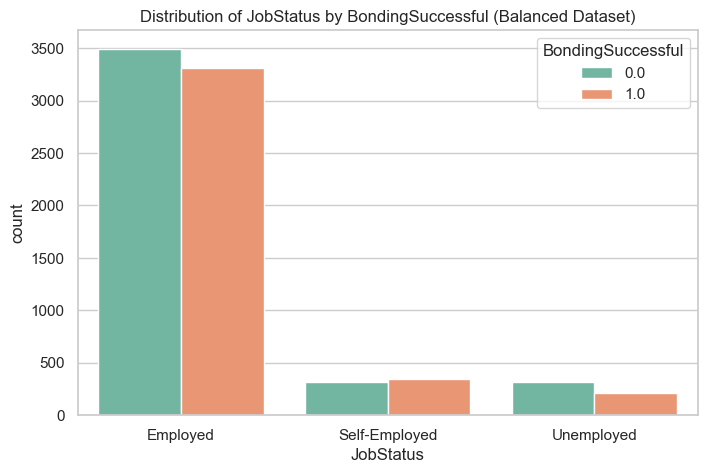

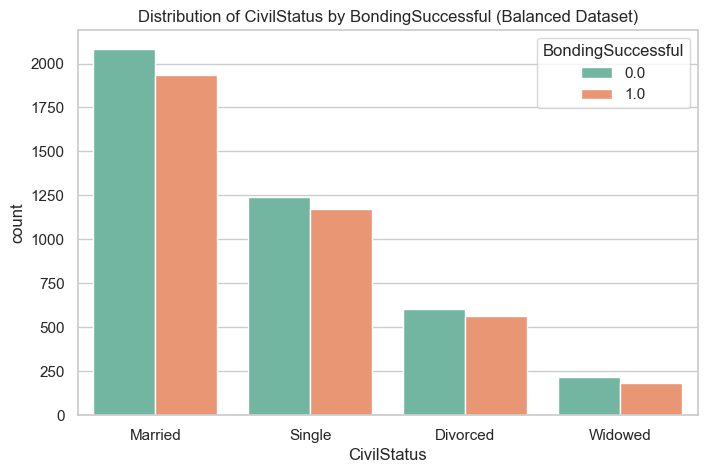

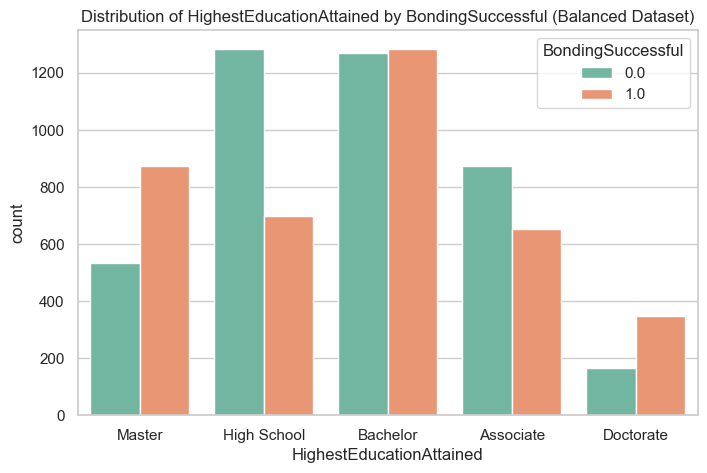

In [42]:
categorical_features = df_balanced.select_dtypes(include=["object", "category"]).columns

for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='BondingSuccessful', data=df_balanced, palette="Set2")
    plt.title(f"Distribution of {col} by BondingSuccessful (Balanced Dataset)")
    plt.show()


##### Observations
`JobStatus` distribution:
most individuals are **Employed**, with a slight bias towards **`BondingSuccessful`=1**. **Self-Employed** and **Unemployed** categories show minimal distinction.

`CivilStatus` distribution:
**Married** individuals are most common, with **`BondingSuccessful`=0** more frequent. Other civil statuses show less clear patterns.

`HighestEducationAttained` distribution:
**Bachelor's** degree holders are the most frequent, with more **`BondingSuccessful`=1** cases. **Master's** and **High School** show similar trends, while **Associate** and **Doctorate** degrees are less frequent.



## Problem Definition
Based on the analysis of the dataset, particularly the `BondingSuccessful` column, we can conclude that:

- This is a **classification problem** where the goal is to predict whether bonding will be successful or not.
- say the 3 models chosen:
**Logistic Regression; Random Forest and Gradient Boosting**

We import the necessary libraries for the models analysis

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

We print again the distribution of the target variable after the balancing to have a clearer view before the preprocessing.

In [10]:
print("Distribution of target variable (Balanced):")
print(df_balanced['BondingSuccessful'].value_counts())

Distribution of target variable (Balanced):
BondingSuccessful
1.0    4307
0.0    4307
Name: count, dtype: int64


### Preprocess the dataset



- Handle missing values (imputation).
- Encode categorical variables (in this way we can work with only numbers and it is easier).
- Remove outliers (if needed).
- Scale numerical features.

In our case we decided to not do the removal of the outliers. It happened because we decided to use RandomForest and GradientBoosting, two models for classification that are very robust, so it isn't necessary to remove the outliers inside the dataset even if they are many, because we already dropped several columns and our dataset can be managed very well by our models.

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

target = "BondingSuccessful"
y = df_balanced[target]
X = df_balanced.drop(columns=[target])

print("Shapes before preprocessing:")
print("X shape:", X.shape)
print("y shape:", y.shape)

numeric_columns = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_columns = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nNumeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_columns),
    ("cat", categorical_transformer, categorical_columns)
])

# 5) Fit & Transform X
X_processed = preprocessor.fit_transform(X)

print("\nFinished preprocessing.")
print(f"X_processed shape: {X_processed.shape}")

Shapes before preprocessing:
X shape: (8614, 24)
y shape: (8614,)

Numeric columns: ['HolidaysTaken', 'PercentageOfCompletedTasks', 'CurrentJobDuration', 'RecentHolidaysTaken', 'RequestedProcessAmount', 'BondingRiskRating', 'TotalMaterialProcessed', 'ByproductRation', 'working_skills', 'dependability', 'MistakesLastYear', 'ChurnRisk', 'ProcessedKilograms', 'WorkExperience', 'HistoricalBehavior', 'TotalMaterialToProcess', 'PriorExecutionDefaults', 'DifferentTasksCompleted', 'BondingPeriod', 'trustability', 'MonthlyExecutions']
Categorical columns: ['JobStatus', 'CivilStatus', 'HighestEducationAttained']

Finished preprocessing.
X_processed shape: (8614, 33)


##### Observations after the preprocessing

This output describes a dataset with 8614 samples and 24 original features. After preprocessing, the number of features increased to 33. The numerical features include variables such as `HolidaysTaken` and `PercentageOfCompletedTasks`, while the categorical features include `JobStatus` and `CivilStatus`. The preprocessing likely involved operations such as encoding categorical variables, normalizing the data, or handling missing values, resulting in an increase in the number of columns from 24 to 33.

### Split the Dataset:



Split of the dataset:
- Training Set
- Validation Set
- Test Set

In [ ]:
# Split off test (20% of entire dataset)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_processed, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # preserves class balance in each split
)

# Split train+val again so that 25% of trainval becomes validation
#    effectively 0.25 * 0.8 = 0.20 overall. 
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, 
    y_trainval, 
    test_size=0.25, 
    random_state=42,
    stratify=y_trainval  # preserve class distribution
)

print("Training Set Shape:   ", X_train.shape, y_train.shape)
print("Validation Set Shape: ", X_val.shape,   y_val.shape)
print("Test Set Shape:       ", X_test.shape,  y_test.shape)


Training Set Shape:    (5168, 33) (5168,)
Validation Set Shape:  (1723, 33) (1723,)
Test Set Shape:        (1723, 33) (1723,)


## Three models compared
In this analysis, we will train and evaluate three machine learning models that are commonly used for classification tasks: 
- Logistic Regression
- Random Forest
- Gradient Boosting




### Logistic Regression

In [ ]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=500)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Evaluate on the validation set
y_pred_logreg = logreg_model.predict(X_val)
logreg_accuracy = accuracy_score(y_val, y_pred_logreg)
logreg_f1       = f1_score(y_val, y_pred_logreg)
logreg_roc      = roc_auc_score(y_val, logreg_model.predict_proba(X_val)[:, 1])

print("Logistic Regression performance on validation set:")
print(f"  Accuracy: {logreg_accuracy:.4f}")
print(f"  F1-Score: {logreg_f1:.4f}")
print(f"  ROC-AUC:  {logreg_roc:.4f}")


Logistic Regression performance on validation set:
  Accuracy: 0.9768
  F1-Score: 0.9769
  ROC-AUC:  0.9976


The logistic regression model achieved 97.68% accuracy, with an F1-score of 0.9769 and ROC-AUC of 0.9976, indicating excellent classification performance.

### Random Forest

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  
    random_state=42
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_f1       = f1_score(y_val, y_pred_rf)
rf_roc      = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])

# Display the result
print("Random Forest performance on validation set:")
print(f"  Accuracy: {rf_accuracy:.4f}")
print(f"  F1-Score: {rf_f1:.4f}")
print(f"  ROC-AUC : {rf_roc:.4f}")


Random Forest performance on validation set:
  Accuracy: 0.9675
  F1-Score: 0.9678
  ROC-AUC : 0.9958


The random forest model achieved 96.75% accuracy, with an F1-score of 0.9678 and ROC-AUC of 0.9958, demonstrating strong classification performance.

### Gradient Boosting Machine

In [ ]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3,       
    random_state=42
)

# Train the model on the training set
gb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_gb = gb_model.predict(X_val)
y_prob_gb = gb_model.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics
gb_accuracy = accuracy_score(y_val, y_pred_gb)
gb_f1 = f1_score(y_val, y_pred_gb)
gb_roc_auc = roc_auc_score(y_val, y_prob_gb)

# Display the results
print("Gradient Boosting performance on validation set:")
print(f"  Accuracy: {gb_accuracy:.4f}")
print(f"  F1-Score: {gb_f1:.4f}")
print(f"  ROC-AUC:  {gb_roc_auc:.4f}")


Gradient Boosting performance on validation set:
  Accuracy: 0.9785
  F1-Score: 0.9787
  ROC-AUC:  0.9979


The gradient boosting model achieved 97.85% accuracy, with an F1-score of 0.9787 and ROC-AUC of 0.9979, indicating excellent classification performance.

### Model Optimization and Evaluation

We conduct the hyperparamter tuning for the 3 models.

### Logistic Regression

In [ ]:
# Hyperparameter tuning for Logistic Regression

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', max_iter=500, random_state=42),
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Perform grid search on the training set
grid_search_lr.fit(X_train, y_train)

# Retrieve the best model from grid search
best_lr_model = grid_search_lr.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")

# Final evaluation on the test set
y_pred_lr = best_lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression accuracy on test set: {accuracy_lr:.4f}")


Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Logistic Regression accuracy on test set: 0.9727


##### Observations
Pre-tuning, the model achieved 97.68% accuracy, 97.69% F1-Score, and a 99.76% ROC-AUC on the validation set. After tuning (C=0.1, solver='lbfgs'), the test set accuracy slightly dropped to 97.27%. This minor difference may reflect data variability or slight overfitting to the validation set.

### Random Forest

In [ ]:
# Hyperparameter tuning for Random Forest

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Perform grid search on the original training set
grid_search_rf.fit(X_train, y_train)

# Retrieve the best model from grid search
best_rf_model = grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Final evaluation on the test set
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest accuracy on test set: {accuracy_rf:.4f}")


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest accuracy on test set: 0.9692


##### Observations
Pre-tuning, the model achieved 96.75% accuracy, 96.78% F1-Score, and a 99.58% ROC-AUC on the validation set. After tuning (max_depth=10, min_samples_split=10, n_estimators=100), the test set accuracy slightly improved to 96.92%, indicating that the optimized parameters enhanced generalization.

### Gradient Boosting

In [ ]:
# Hyperparameter tuning for Gradient Boosting

from sklearn.model_selection import RandomizedSearchCV

param_distributions_gb = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions_gb,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Perform random search on the training set
random_search_gb.fit(X_train, y_train)

# Retrieve the best model from random search
best_gb_model = random_search_gb.best_estimator_
print(f"Best parameters for Gradient Boosting: {random_search_gb.best_params_}")

# Final evaluation on the test set
y_pred_gb = best_gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting accuracy on test set: {accuracy_gb:.4f}")


Best parameters for Gradient Boosting: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting accuracy on test set: 0.9803


##### Observations
The outputs show that hyperparameter tuning slightly improved the model's performance. Before tuning, Gradient Boosting achieved 97.85% accuracy and 97.87% F1-Score on the validation set, with a ROC-AUC of 99.79%. After tuning, the test accuracy increases to 98.03%. This indicates the model generalizes very well.

## Compare Models:
We use metrics like accuracy, F1-score, and ROC-AUC to compare models.

Evaluate the Best Model:
Test the final model on the reserved test set.

Model Comparison Results:

Logistic Regression:
  Accuracy: 0.9727
  F1-Score: 0.9727
  ROC-AUC: 0.9966

Random Forest:
  Accuracy: 0.9692
  F1-Score: 0.9694
  ROC-AUC: 0.9964

Gradient Boosting:
  Accuracy: 0.9803
  F1-Score: 0.9803
  ROC-AUC: 0.9983


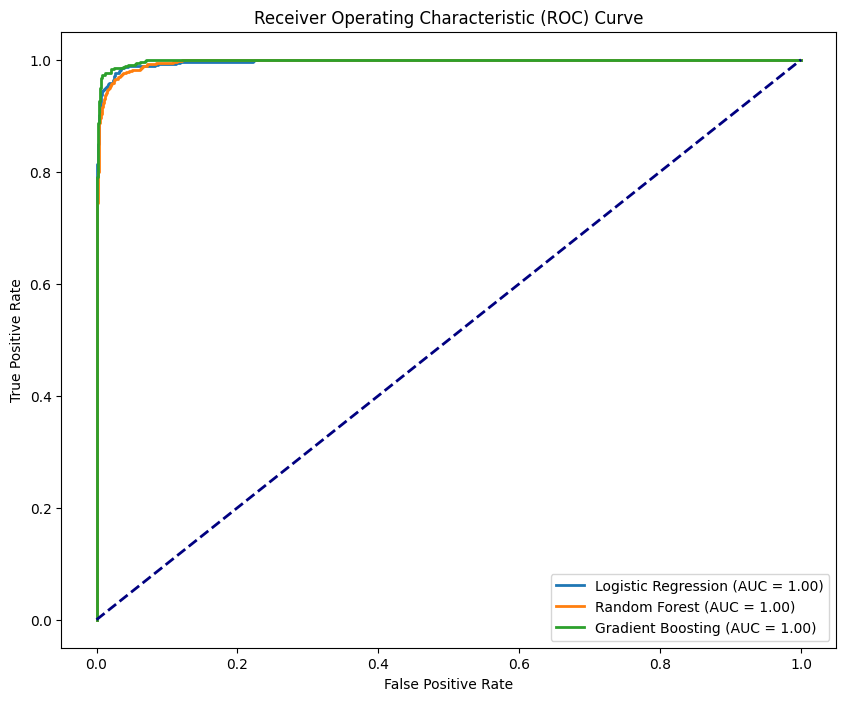


Final Evaluation of Best Model (Gradient Boosting):
  Accuracy: 0.9803
  F1-Score: 0.9803
  ROC-AUC:  0.9983


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

# Function to calculate ROC-AUC
def compute_roc_auc(model, X, y):
    y_prob = model.predict_proba(X)[:, 1]  # Probability for the positive class
    return roc_auc_score(y, y_prob)

# Define models and their names
models = {
    'Logistic Regression': best_lr_model,
    'Random Forest': best_rf_model,
    'Gradient Boosting': best_gb_model
}

# Initialize a dictionary to store comparison results
comparison_results = {}

# Compare models using accuracy, F1-score, and ROC-AUC
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    comparison_results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Print model comparison results
print("Model Comparison Results:")
for name, metrics in comparison_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Plot ROC Curve for all models
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc_val:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Identify the best model based on ROC-AUC
best_model_name = max(comparison_results, key=lambda x: comparison_results[x]['ROC-AUC'])
best_model = models[best_model_name]

# Final Evaluation of the Best Model on the Test Set
y_pred_best = best_model.predict(X_test)
best_model_accuracy = accuracy_score(y_test, y_pred_best)
best_model_f1 = f1_score(y_test, y_pred_best)
best_model_roc_auc = compute_roc_auc(best_model, X_test, y_test)

print(f"\nFinal Evaluation of Best Model ({best_model_name}):")
print(f"  Accuracy: {best_model_accuracy:.4f}")
print(f"  F1-Score: {best_model_f1:.4f}")
print(f"  ROC-AUC:  {best_model_roc_auc:.4f}")


The final evaluation of the Gradient Boosting model demonstrates exceptional performance, with an accuracy of 0.9803, an F1-Score of 0.9803, and a ROC-AUC of 0.9983. These metrics indicate that the model correctly predicts approximately 98.03% of the test cases while maintaining an excellent balance between precision and recall, as reflected by the high F1-Score. The very high ROC-AUC score underscores the model's ability to effectively distinguish between classes, minimizing false positives and false negatives. Overall, these results highlight the Gradient Boosting model as a powerful and reliable choice for this classification task, making it well-suited for real-world applications.

### Feature Importance

We want to show the **feature importance** of the three different models: **Logistic Regression**, **Random Forest**, and **Gradient Boosting**. It extracts and ranks the importance of each feature based on how much it contributes to the model's predictions. The results give us a clear comparison of which features are most influential across the three models. This helps understand which features drive the model's decisions and can guide further analysis or feature selection.


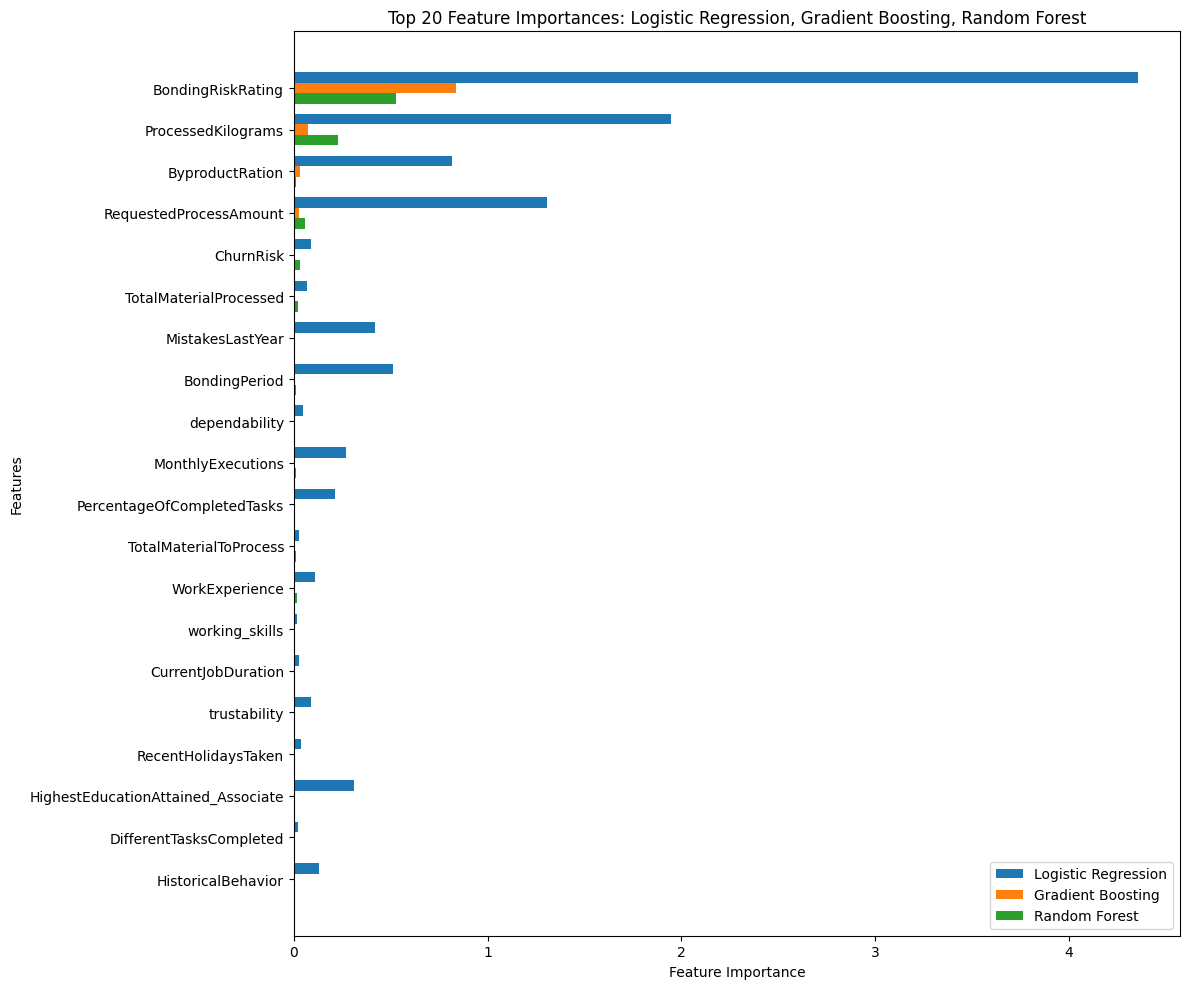

In [ ]:
# Feature importance for Logistic Regression (using coefficients)
def plot_feature_importance_lr(model, feature_names):
    importance = np.abs(model.coef_[0])  # Coefficients for Logistic Regression
    feature_importance = pd.Series(importance, index=feature_names)
    feature_importance = feature_importance.sort_values(ascending=False)
    return feature_importance

# Feature importance for Random Forest
def plot_feature_importance_rf(model, feature_names):
    importance = model.feature_importances_  # Feature importance for Random Forest
    feature_importance = pd.Series(importance, index=feature_names)
    feature_importance = feature_importance.sort_values(ascending=False)
    return feature_importance

# Feature importance for Gradient Boosting
def plot_feature_importance_gb(model, feature_names):
    importance = model.feature_importances_  # Feature importance for Gradient Boosting
    feature_importance = pd.Series(importance, index=feature_names)
    feature_importance = feature_importance.sort_values(ascending=False)
    return feature_importance

# Extract feature names from the preprocessor or column names
feature_names = preprocessor.get_feature_names_out() if 'preprocessor' in globals() else X_train.columns
cleaned_features = [feature.replace('num__', '').replace('cat__', '') for feature in feature_names]

# Extract feature importances
feature_importance_lr = plot_feature_importance_lr(best_lr_model, cleaned_features)
feature_importance_rf = plot_feature_importance_rf(best_rf_model, cleaned_features)
feature_importance_gb = plot_feature_importance_gb(best_gb_model, cleaned_features)

# Select top 20 features for each model
top_n = 20
sorted_features = feature_importance_gb.index[:top_n]
importance_gb = feature_importance_gb.values[:top_n]
importance_rf = feature_importance_rf.reindex(sorted_features).values
importance_lr = feature_importance_lr.reindex(sorted_features).values

# Create a bar plot
x = np.arange(top_n)
plt.figure(figsize=(12, 10))
width = 0.25

# Plot the importances (Logistic Regression first, then Gradient Boosting)
plt.barh(x - width, importance_lr, height=0.25, label='Logistic Regression')
plt.barh(x, importance_gb, height=0.25, label='Gradient Boosting')
plt.barh(x + width, importance_rf, height=0.25, label='Random Forest')
plt.yticks(x, sorted_features, rotation=0)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances: Logistic Regression, Gradient Boosting, Random Forest')
plt.legend()
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


From the graph, we see that `BondingRiskRating` is the most important feature across all models. Gradient Boosting assigns relatively higher importance to features like `ProcessedKilograms` and `RequestedProcessAmount`, while Random Forest and Logistic Regression exhibit some differences in feature ranking. This variation underscores how different models prioritize features differently, reflecting their unique mechanisms for capturing relationships in the data.

### Our analysis ends here.
Thank you for the attention